In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('data/training_data.csv')
df.head()

,id,mz_low,mz_high,Name,root_region_intensity,m/z,spec_id
0,0,87.0007,87.0157,Pyruvic acid,3749.830566,87.0082,aff596aa-8aff-479f-a8dc-9a3957e1b0f7
1,1,88.0328,88.0478,L-Alanine,3823.749268,88.0403,fb922874-2fe7-4abb-95ca-2d14b6079849
2,2,89.0164,89.0314,Lactic acid,899.031799,89.0239,64544264-90f6-4a16-8f85-2d80aa3e7393
3,4,104.0277,104.0427,Serine,542.101440,104.0352,447d1f1f-1771-485a-933f-ee807559dca5
4,5,108.0049,108.0199,Hypotaurine,191.645645,108.0124,5ebe984d-670f-4bab-8395-ea648f291266


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     213 non-null    int64  
 1   mz_low                 213 non-null    float64
 2   mz_high                213 non-null    float64
 3   Name                   213 non-null    object 
 4   root_region_intensity  213 non-null    float64
 5   m/z                    213 non-null    float64
 6   spec_id                213 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 11.8+ KB


In [5]:
df.describe()

,id,mz_low,mz_high,root_region_intensity,m/z
count,213.000000,213.000000,213.000000,213.000000,213.000000
mean,208.863850,485.968550,485.990583,1768.535771,485.979568
std,140.679434,276.851001,276.858769,12291.946409,276.854883
min,0.000000,87.000700,87.015700,41.825127,87.008200
25%,83.000000,183.994200,184.009200,181.320602,184.001700
50%,169.000000,482.954000,482.969000,252.063065,482.961500
75%,352.000000,751.513588,751.558687,581.039551,751.536137
max,405.000000,1045.451962,1045.508549,176027.687500,1045.480256


In [7]:
df.isnull().sum()

id                       0
mz_low                   0
mz_high                  0
Name                     0
root_region_intensity    0
m/z                      0
spec_id                  0
dtype: int64

In [8]:
npz_dir = 'data/npz_data'

In [11]:
# loading npz 
import os
spec_id=df.loc[0,'spec_id']
npz_path=os.path.join(npz_dir,f"{spec_id}.npz")

with np.load(npz_path) as npz:
    mz = npz['mz']
    intensities = npz['intensities']

print("\nFirst Spec ID:", spec_id)
print("m/z shape:", mz.shape)
print("Intensity shape:", intensities.shape)
print("\nSample m/z values:", mz[:10])
print("Sample intensities:", intensities[:10])


First Spec ID: aff596aa-8aff-479f-a8dc-9a3957e1b0f7
m/z shape: (80,)
Intensity shape: (80,)

Sample m/z values: [86.99064875 86.9910837  86.99151866 86.99195361 86.99238857 86.99282354
 86.9932585  86.99369347 86.99412844 86.99456341]
Sample intensities: [4.8089743 8.8732    5.7162895 7.9441743 5.0840626 6.9757705 5.213771
 9.002102  4.0344863 9.366201 ]


### Visualizations

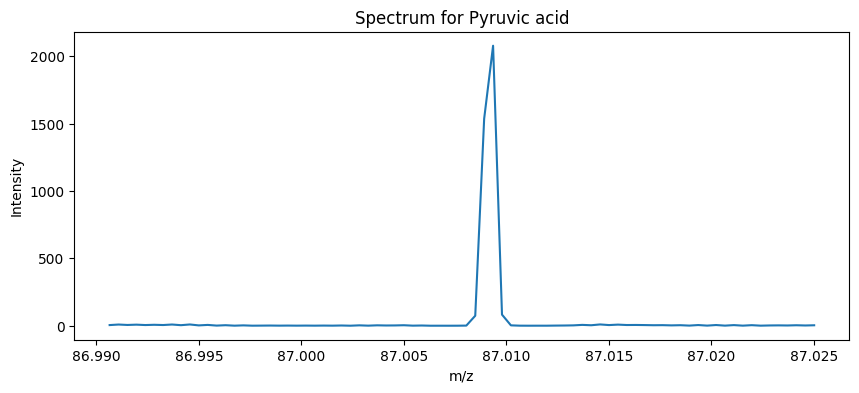

In [12]:
import matplotlib.pyplot as plt

compound = df.loc[0]["Name"]

plt.figure(figsize=(10, 4))
plt.plot(mz, intensities)
plt.title(f"Spectrum for {compound}")
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.show()

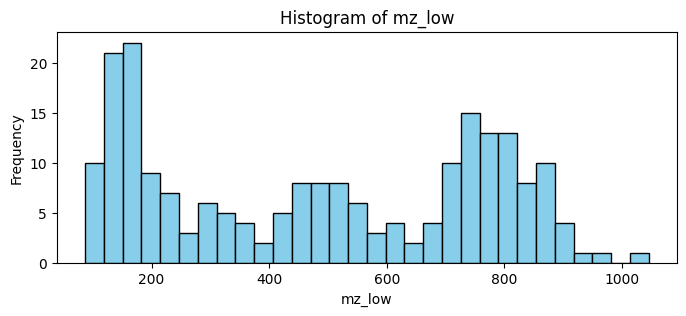

In [13]:
plt.figure(figsize=(8, 3))
plt.hist(df["mz_low"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of mz_low")
plt.xlabel("mz_low")
plt.ylabel("Frequency")
plt.show()

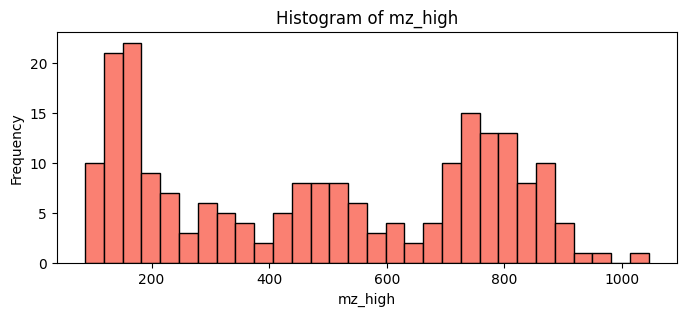

In [14]:
plt.figure(figsize=(8, 3))
plt.hist(df["mz_high"], bins=30, color="salmon", edgecolor="black")
plt.title("Histogram of mz_high")
plt.xlabel("mz_high")
plt.ylabel("Frequency")
plt.show()

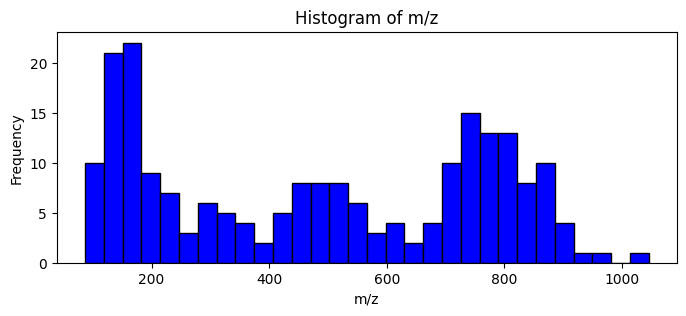

In [16]:
plt.figure(figsize=(8, 3))
plt.hist(df["m/z"], bins=30, color="blue", edgecolor="black")
plt.title("Histogram of m/z")
plt.xlabel("m/z")
plt.ylabel("Frequency")
plt.show()

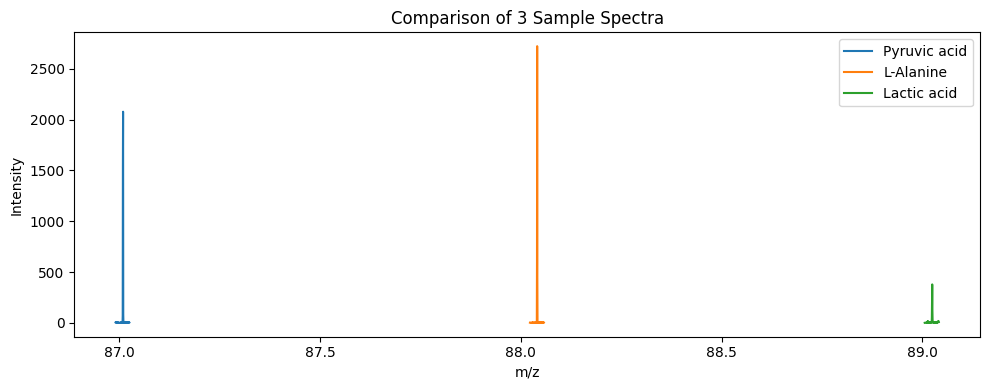

In [18]:
with np.load(npz_path) as data:
    mz=data['mz']
    intensities = data['intensities']

plt.figure(figsize=(10, 4))
for _, row in df.head(3).iterrows():
    spec_id = row["spec_id"]
    name = row["Name"]
    npz_path = os.path.join(npz_dir, f"{spec_id}.npz")
    with np.load(npz_path) as data:
        mz = data["mz"]
        intensities = data["intensities"]
    plt.plot(mz, intensities, label=name)


plt.title("Comparison of 3 Sample Spectra")
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

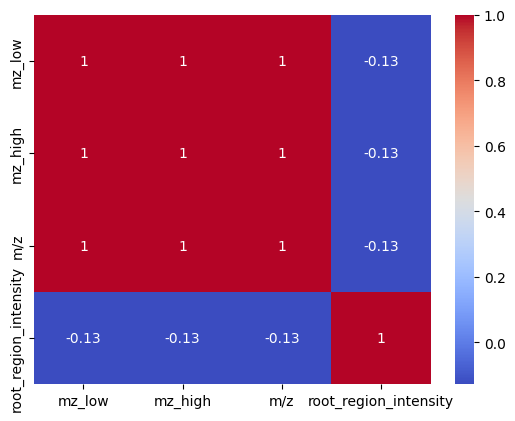

In [19]:
import seaborn as sns
sns.heatmap(df[['mz_low','mz_high','m/z','root_region_intensity']].corr(),annot=True, cmap='coolwarm')

In [21]:
num_df=df.select_dtypes(include=[np.number])
num_df.drop(['id'],axis=1,inplace=True)
num_df.corr()

,mz_low,mz_high,root_region_intensity,m/z
mz_low,1.000000,1.000000,-0.127881,1.000000
mz_high,1.000000,1.000000,-0.127881,1.000000
root_region_intensity,-0.127881,-0.127881,1.000000,-0.127881
m/z,1.000000,1.000000,-0.127881,1.000000


In [25]:
import json
mz_min = df[['mz_low', 'mz_high','m/z']].min().min()
mz_max = df[['mz_low', 'mz_high','m/z']].max().max()


df['mz_low_norm'] = (df['mz_low'] - mz_min) / (mz_max - mz_min)
df['mz_high_norm'] = (df['mz_high'] - mz_min) / (mz_max - mz_min)
df['m/z_norm'] = (df['m/z'] - mz_min) / (mz_max - mz_min)

# Save normalization range for later inverse transformation
with open("norm_params.json", "w") as f:
    json.dump({'mz_min': float(mz_min), 'mz_max': float(mz_max)}, f)


X = []  
y = []  

# Loop through each spectrum
for _, row in df.iterrows():
    spec_id = row['spec_id']
    npz_path = os.path.join(npz_dir, f"{spec_id}.npz")
    
    if not os.path.exists(npz_path):
        continue

    with np.load(npz_path) as data:
        mz = data['mz']
        intensities = data['intensities']

    # Normalize intensities to [0, 1]
    norm_intensities = intensities / (np.max(intensities) + 1e-8)

    # Stack mz and intensity to shape (80, 2)
    spectrum = np.stack([mz, norm_intensities], axis=1)
    X.append(spectrum.astype(np.float32))

    # Normalized targets
    y.append([
        row['mz_low_norm'],
        row['mz_high_norm'],
        row['m/z_norm'],
    ])

# Convert to arrays
X = np.array(X) 
y = np.array(y)  

# Save for modeling
np.save("X.npy", X)
np.save("y.npy", y)

### Lasso and Ridge Regression

In [26]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load preprocessed data
X = np.load("X.npy")    
y = np.load("y.npy")    

# Flatten X to (N, 160) for ML models
X_flat = X.reshape(X.shape[0], -1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)



In [27]:
# Evaluate
def print_scores(name, y_test, y_pred):
    print(f"--- {name} ---")
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))  
    print()

In [36]:
# Initialize models
ridge = Ridge(alpha=1.0)
# Train
ridge.fit(X_train, y_train)
# Predict
ridge_preds = ridge.predict(X_test)
print_scores("Ridge", y_test, ridge_preds)

--- Ridge ---
MSE : 4.704119984702083e-12
MAE : 1.5157146690991534e-06
R² Score: 0.9999999999317555



In [32]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
print_scores("Lasso", y_test, lasso_preds)

--- Lasso ---
MSE : 1.0025066602782364e-09
MAE : 2.79896172238998e-05
R² Score: 0.9999999854562648



### Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

print_scores("Random Forest", y_test, rf_preds)

--- Random Forest ---
MSE : 1.6449878970074657e-05
MAE : 0.0029973731658153474
R² Score: 0.9997613553298351

